Exercise 2: Implementing the K-Nearest Neighbors (KNN) Model

1. Implement a KNN Classifier

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

data = pd.read_csv('Breast Cancer Diagnosis Dataset with Tumor Characteristics.csv')

data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})  # Convert diagnosis to binary

X = data.drop(columns=['id', 'diagnosis'])
y = data['diagnosis']

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [21]:

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of KNN with n_neighbors=5: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy of KNN with n_neighbors=5: 0.96
Confusion Matrix:
[[70  1]
 [ 4 39]]


2. Experiment with Different Values of n_neighbors

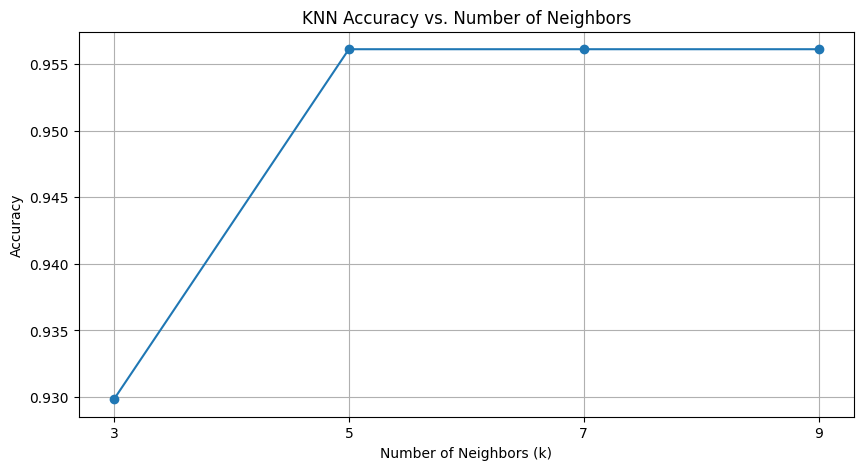

The optimal value of n_neighbors is: 5


In [20]:
neighbors = [3, 5, 7, 9]
accuracies = []

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 5))
plt.plot(neighbors, accuracies, marker='o')
plt.title('KNN Accuracy vs. Number of Neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(neighbors)
plt.grid()
plt.show()

optimal_n_neighbors = neighbors[np.argmax(accuracies)]
print(f'The optimal value of n_neighbors is: {optimal_n_neighbors}')